In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import json
import pandas as pd

In [6]:
RESULTS_JSON_PATH = "./dipco_nemo/raw_results.json"

experiment_name = RESULTS_JSON_PATH.split("/")[-1].replace('.json', '')

results = json.load( open(RESULTS_JSON_PATH) )

metrics = ["der", "miss", "false_alarm", "confusion"]

## Plot the distribution of each metric

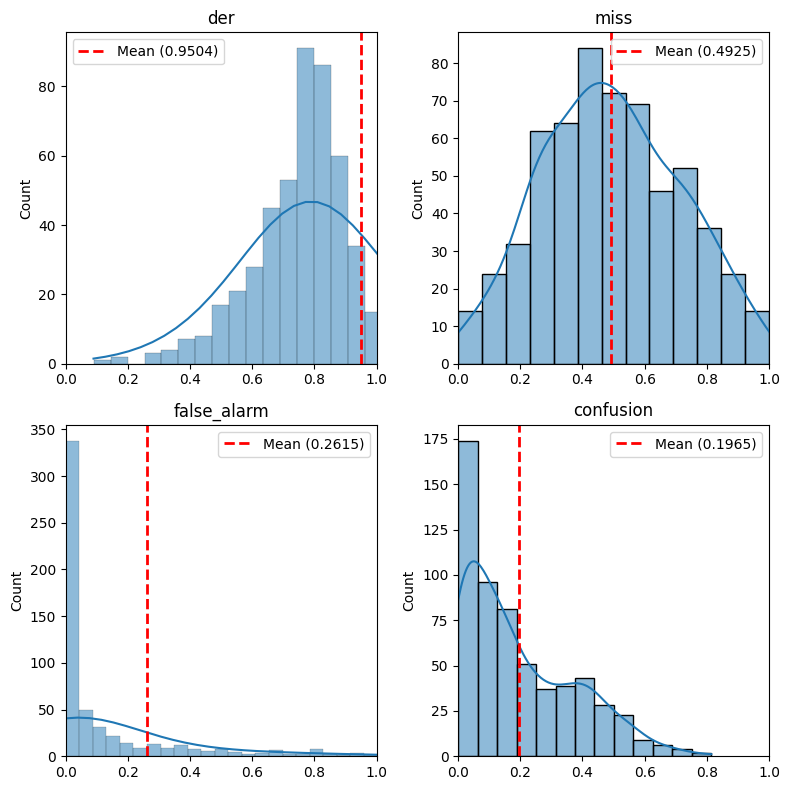

In [7]:
summary = pd.DataFrame(index=metrics, columns=['mean', 'std'])

plt.figure(figsize=(8,8))

for i in range(4):
   
    plt.subplot(2,2,i+1)

    metric_name = metrics[i]
    metric_vals = np.array( [sample[metric_name] for sample in results] )

    sns.histplot(metric_vals, kde=True, log_scale=False)

    mean = metric_vals.mean()
    std = metric_vals.std()

    summary.loc[metric_name, 'mean'] = mean
    summary.loc[metric_name, 'std'] = std

    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean ({mean:.4f})')
    
    plt.title(metric_name)
    plt.xlim(0,1)
    plt.legend()

plt.tight_layout()
plt.show()

summary.to_csv(f'./{experiment_name}_summary.csv')

# Plot DER vs. Number of Speakers

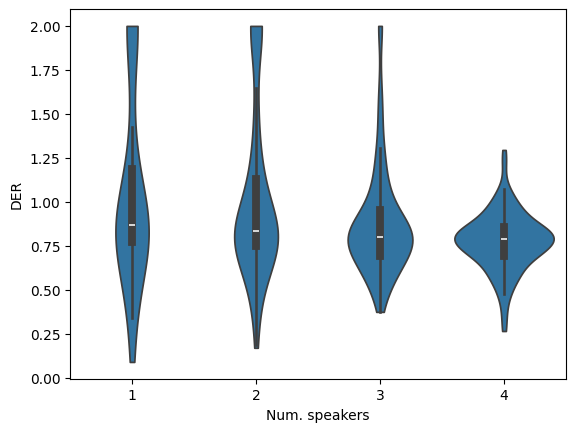

In [8]:
clip_der = 2.0

der = [min(sample['der'], clip_der) for sample in results]


n_speakers = [sample['info']['n_speakers'] for sample in results]

sns.violinplot(x=n_speakers, y=der, cut=0)
plt.xlabel('Num. speakers')
plt.ylabel('DER')

plt.show()